# Prosper Loan Data Analysis
### by John King

## Preliminary Data Assessment

> The dataset being used in this analysis is a very complete set with details on a large number of loans originated by Prosper. It includes information about borrowers such as borrower location, employment status, income, credit rating, etc. Loan status, loan category, loan amount, interest rate, yield and loss, are also included.  

>Analysis will be approached with key questions in mind: What is Prosper's overall loan profile in terms of credit rating and loan category? What factors influence Prosper's rating system (ProsperRating/ProsperScore) and how does this rating impact interest rate? Which borrower and loan attributes are associated with loan delinquency and loss? Can we make any recommendations based on findings?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

### How large is this dataset?

In [3]:
loans.shape

(113937, 81)

### An overview of features

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Structure of the dataset

> This a large data set consisting of appx 114,000 rows and 81 attribute columns. Each row represents a single loan, and attributes are provided for each loan where applicable. This provides a wealth of detail for each loan.

### Main features of interest in the dataset

> In the initial exploration of Prosper's rating system, I'll observe its relationship to credit score, which I expect to be highly determinitive when it comes to rating. If correlations to other features become evident, I will explore further and attempt to visualize these relationships. 


## Exploring Prosper's Credit Rating System
Here I explore various credit related features and their correlation to Prosper's rating and score system.

### What is the distribution of ProsperRating and credit score?
What is Prosper's overall credit rating profile, and how closely related are these two features?

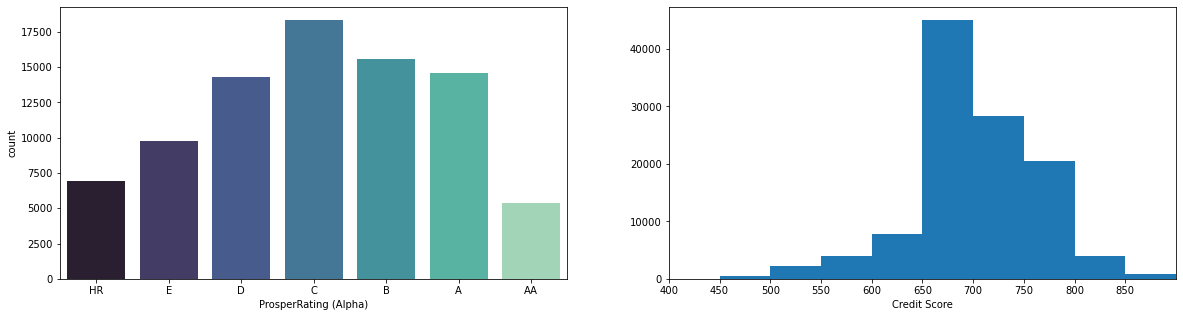

In [5]:
#create subplots, rating order, and custom bins, ticks and labels for second plot
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
rating_order = ['HR','E','D','C','B','A', 'AA']
sb.countplot(data=loans, x = 'ProsperRating (Alpha)', order = rating_order, palette = 'mako')
plt.subplot(1,2,2)
bins = np.arange(0, loans['CreditScoreRangeUpper'].max() + 50, 50)
ticks = np.arange(400, 900, 50)
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=loans, x= 'CreditScoreRangeUpper', bins=bins)
plt.xlim((400, 900))
plt.xticks(ticks, labels)
plt.xlabel('Credit Score');

The distribution of ProsperRating looks unsurprisingly normal, with their average rating as the lead rating in terms of loan origination. The credit score distribution on the other hand looks far more left skewed, and it appears that 650 is a highly determinitive scrore. I want to learn more about what factors influence this lender's credit rating system. I'll start by observing avg credit score for each rating.

### What is the average credit score for each ProsperRating?

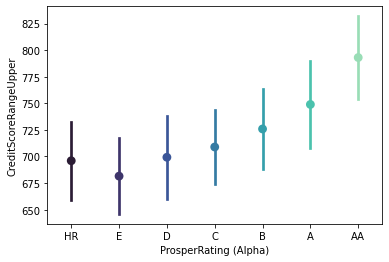

In [6]:
#create ordered pointplot with confidence internal, connecting line turned off, and sequential color palette
sb.pointplot(data=loans, x = 'ProsperRating (Alpha)', y = 'CreditScoreRangeUpper', ci = 'sd', linestyles = '', order = rating_order, palette = 'mako');

The average credit score follows a predictable upward trend with ProsperRating, but it's surprising that the lowest rating, HR (high risk), would have a higher average credit score than the second lowest rating, E. Another observation that calls for further exploration of determinitive factors in ProsperRating. As APR can be seen as another measure of how Prosper assesses risk, I'll observe the correlation between credit score and APR.

### How does credit score correlate to APR?

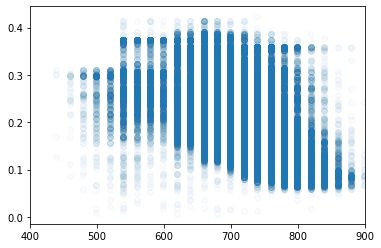

In [7]:
#create scatterplot with transparency and limited x-axis
plt.scatter(data=loans, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 1/40)
plt.xlim((400, 900));

While there is certainly a negative correlation between credit score and APR as expected, observing high APRs for scores between 700-800 provides further evidence that other credit factors are playing a role in how Prosper rates their borrowers.  

Next, I'll look at a correlation matrix for credit related features, to see which features are most determinitive in ProsperRating, and ProsperScore.

### Which credit related features have the strongest impact on ProsperRating and ProsperScore, and how do these features correlate to each other?

In [8]:
#create a df with credit features for use in correlation matrix
credit_features = loans[['ProsperRating (numeric)', 'ProsperScore','CreditScoreRangeUpper', 'CreditScoreRangeLower','DebtToIncomeRatio',
                       'StatedMonthlyIncome','DelinquenciesLast7Years','EmploymentStatusDuration','BankcardUtilization',
                         'OpenCreditLines','AvailableBankcardCredit']]

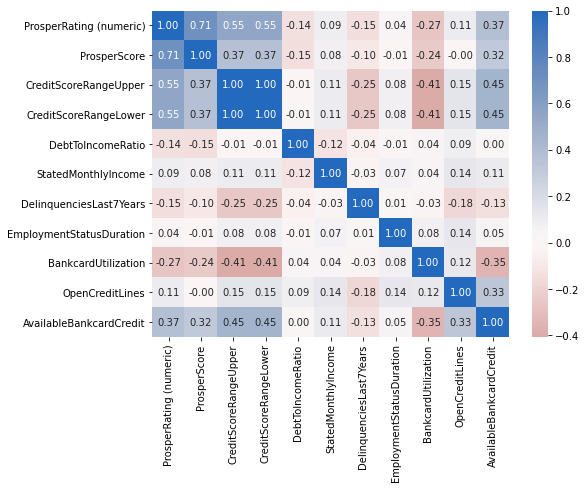

In [9]:
#create correlation matrix with annotations and reversed vlag color palette
plt.figure(figsize = [8,6])
sb.heatmap(credit_features.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

Of the credit related features observed in the correlation matrix, the features with the strongest correlation to ProsperRating are credit score, debt to income ratio, delinquencies, bank card utilization and available credit. Next, I'll isolate these features and observe the mean of each feature for each rating. This will provide a profile of each rating in relation to these key features.

### What is the average of key credit related features for each ProsperRating?

In [10]:
#create a dataframe of key credit features
key_credit_features = loans[['ProsperRating (Alpha)','CreditScoreRangeUpper','DebtToIncomeRatio','DelinquenciesLast7Years','BankcardUtilization','AvailableBankcardCredit']]

In [11]:
#group rows by Prosper rating and display average for features
key_credit_features.groupby('ProsperRating (Alpha)').mean()

,CreditScoreRangeUpper,DebtToIncomeRatio,DelinquenciesLast7Years,BankcardUtilization,AvailableBankcardCredit
ProsperRating (Alpha),,,,,
A,748.942959,0.216333,1.942822,0.462654,18828.552127
AA,793.050633,0.173188,0.505212,0.282379,36179.322785
B,725.900712,0.237178,3.072075,0.556980,12074.206405
C,708.929681,0.272869,3.913273,0.620384,8333.799782
D,699.273224,0.269747,4.817781,0.616629,6055.187614
E,681.542113,0.290523,5.786217,0.663933,4221.141603
HR,695.994953,0.378029,4.964672,0.614627,4363.954146


As expected, performance in each feature increases with each upward rating tier, with only a few exceptions.

To return to our previous observation RE the avg credit score for the lowest rating, HR, we see an average debt-to-income ratio that is substantially higher than the average in other rating categories. Only observing credit score, delinquencies, credit utilization and available credit, you might place the HR rating as the second lowest rating, but the debt to income ratio is clearly very determinitive in Prosper's risk assesment.  

It's also interesting to observe that the AA rating has significantly better performance than even the next tier down. Performance is much more ideal in all features, particularly in delinquencies, credit utilization and available credit.  

Now that I have a good sense of how Prosper assesses risk, I'd like to observe the impact that their rating has on the cost of their loans.

### How does a borrower's ProsperScore (risk score) and ProsperRating impact their APR?

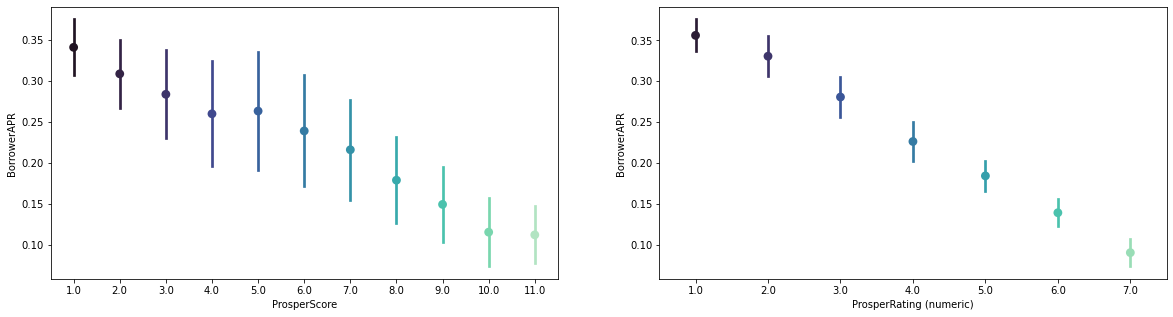

In [12]:
#create subplots, adjust size and create ordered pointplots
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
sb.pointplot(data=loans, x = 'ProsperScore', y = 'BorrowerAPR', ci = 'sd', linestyles = '', palette = 'mako')
plt.subplot(1,2,2)
sb.pointplot(data=loans, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', ci = 'sd', linestyles = '', palette = 'mako');

Prosper's rating and risk assessment correlates very stongly to the cost of their loans. A borrower with the lowest rating will have an APR roughly three times higher than a borrower with the highest rating.

## Performance of ProsperRating and ProsperScore in Predicting Charge-Off, Default and Delinquency

### What is the distribution of ProsperRating and ProsperScore for loans that have been charged off?

In [13]:
#create new dataframe with chargedoff loans only
chargeoff = loans.query('LoanStatus == "Chargedoff"')

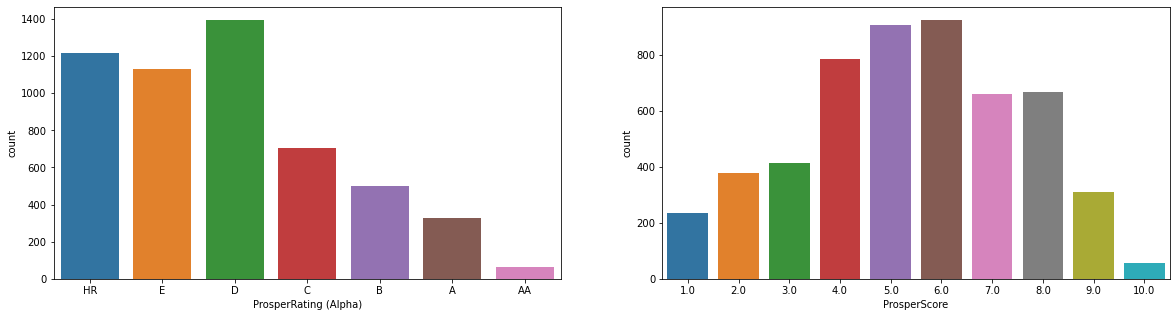

In [14]:
#create subplots, adjust size and create ordered countplots
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
sb.countplot(data=chargeoff, x = 'ProsperRating (Alpha)', order = rating_order)
plt.subplot(1,2,2)
sb.countplot(data=chargeoff, x = 'ProsperScore');

At first glance these plots suggest that ProsperRating and Score are not well suited to predict risk, but both of the above plots can be misleading. They do not take into account the total number of loans originated within each rating and score. Let's engineer a feature that will allow us to view charge-off, default and delinquency rates and review these rates for each rating and score. To do that I'll create two separate dataframes.

### What is the rate of charge-off, default and delinquency for each ProsperRating?

In [15]:
#create new dataframe containing count of loans for each rating
pr_cdd = loans.groupby('ProsperRating (Alpha)')['ProsperRating (Alpha)'].count()
pr_cdd = pd.DataFrame(pr_cdd)
#create new column containing count of loans chargedoff for each rating
pr_cdd['chargeoff_count'] = loans.query('LoanStatus == "Chargedoff"').groupby('ProsperRating (Alpha)')['ProsperRating (Alpha)'].count()
#rename count column to loans_disbursed
pr_cdd.rename(columns = {'ProsperRating (Alpha)': 'loans_disbursed'}, inplace = True)
#create new column containing chargeoff rate for each rating
pr_cdd['chargeoff_rate'] = pr_cdd['chargeoff_count'] / pr_cdd['loans_disbursed'] * 100
#create new column containing count of loans in default for each rating
pr_cdd['default_count'] = loans.query('LoanStatus == "Defaulted"').groupby('ProsperRating (Alpha)')['ProsperRating (Alpha)'].count()
#create new column containing default rate for each rating
pr_cdd['default_rate'] = pr_cdd['default_count'] / pr_cdd['loans_disbursed'] * 100
#create new column containing count of loans in delinquency for each rating
pr_cdd['del_count'] = loans.query('LoanStatus == "Past Due (1-15 days)" or LoanStatus == "Past Due (31-60 days)" or LoanStatus == "Past Due (61-90 days)" or LoanStatus == "Past Due (91-120 days)" or LoanStatus == "Past Due (16-30 days)" or LoanStatus == "Past Due (>120 days)"').groupby('ProsperRating (Alpha)')['ProsperRating (Alpha)'].count()
#create new column containing delinquency rate for each rating
pr_cdd['deliquency_rate'] = pr_cdd['del_count'] / pr_cdd['loans_disbursed'] * 100
#reset index
pr_cdd.reset_index(inplace = True)

In [16]:
pr_cdd

,ProsperRating (Alpha),loans_disbursed,chargeoff_count,chargeoff_rate,default_count,default_rate,del_count,deliquency_rate
0,A,14551,326,2.240396,79,0.542918,154,1.058347
1,AA,5372,63,1.172748,20,0.372301,25,0.465376
2,B,15581,500,3.209037,88,0.564790,278,1.784224
3,C,18345,706,3.848460,134,0.730444,489,2.665576
4,D,14274,1395,9.773014,282,1.975620,457,3.201625
5,E,9795,1131,11.546708,193,1.970393,375,3.828484
6,HR,6935,1215,17.519827,209,3.013699,289,4.167267


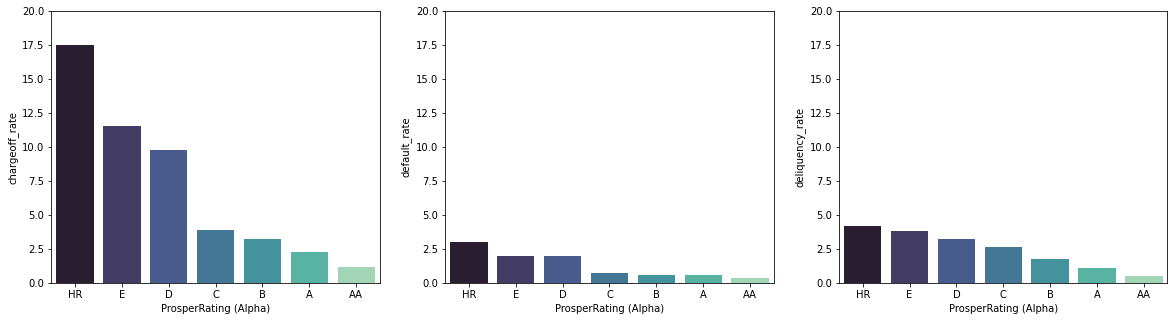

In [17]:
#create subplots, create custom ticks and labels to unify y-axis scale, create ordered barplots with sequential color palette
ticks = np.arange(0, 18+2.5, 2.5)
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
sb.barplot(data=pr_cdd, x = 'ProsperRating (Alpha)', y = 'chargeoff_rate', order = rating_order, palette = 'mako')
plt.yticks(ticks, labels)
plt.subplot(1,3,2)
sb.barplot(data=pr_cdd, x = 'ProsperRating (Alpha)', y = 'default_rate', order = rating_order, palette = 'mako')
plt.yticks(ticks, labels)
plt.subplot(1,3,3)
sb.barplot(data=pr_cdd, x = 'ProsperRating (Alpha)', y = 'deliquency_rate', order = rating_order, palette = 'mako')
plt.yticks(ticks, labels);

It seems that ProsperRating does a good job of predicting risk, as rate of charge-off, default and delinquency all have a linear relationship to ProsperRating.

### What is the rate of charge-off, default and delinquency for each ProsperScore?

In [18]:
#repeating steps above to create new dataframe with counts of loans and counts/rates for chargeoff, default and delinquency
ps_cdd = loans.groupby('ProsperScore')['ProsperScore'].count()
ps_cdd = pd.DataFrame(ps_cdd)
ps_cdd['chargeoff_count'] = loans.query('LoanStatus == "Chargedoff"').groupby('ProsperScore')['ProsperScore'].count()
ps_cdd.rename(columns = {'ProsperScore': 'loans_disbursed'}, inplace = True)
ps_cdd['chargeoff_rate'] = ps_cdd['chargeoff_count'] / ps_cdd['loans_disbursed'] * 100
ps_cdd['default_count'] = loans.query('LoanStatus == "Defaulted"').groupby('ProsperScore')['ProsperScore'].count()
ps_cdd['default_rate'] = ps_cdd['default_count'] / ps_cdd['loans_disbursed'] * 100
ps_cdd['del_count'] = loans.query('LoanStatus == "Past Due (1-15 days)" or LoanStatus == "Past Due (31-60 days)" or LoanStatus == "Past Due (61-90 days)" or LoanStatus == "Past Due (91-120 days)" or LoanStatus == "Past Due (16-30 days)" or LoanStatus == "Past Due (>120 days)"').groupby('ProsperScore')['ProsperScore'].count()
ps_cdd['deliquency_rate'] = ps_cdd['del_count'] / ps_cdd['loans_disbursed'] * 100
ps_cdd.reset_index(inplace = True)

In [19]:
ps_cdd

,ProsperScore,loans_disbursed,chargeoff_count,chargeoff_rate,default_count,default_rate,del_count,deliquency_rate
0,1.0,992,235.0,23.689516,37,3.729839,40,4.032258
1,2.0,5766,377.0,6.538328,70,1.214013,252,4.370447
2,3.0,7642,414.0,5.417430,75,0.981418,252,3.297566
3,4.0,12595,784.0,6.224692,119,0.944819,360,2.858277
4,5.0,9813,907.0,9.242841,165,1.681443,282,2.873739
5,6.0,12278,925.0,7.533800,173,1.409024,327,2.663300
6,7.0,10597,662.0,6.247051,135,1.273945,217,2.047749
7,8.0,12053,666.0,5.525595,139,1.153240,233,1.933129
8,9.0,6911,309.0,4.471133,71,1.027348,70,1.012878
9,10.0,4750,57.0,1.200000,20,0.421053,32,0.673684


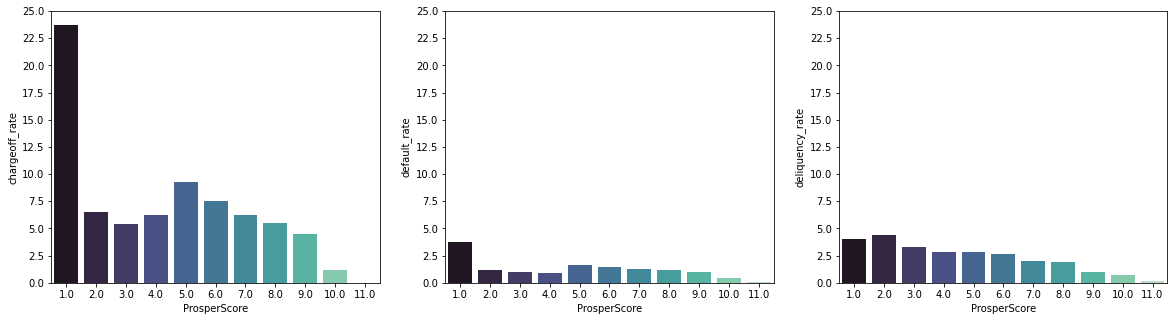

In [20]:
#create subplots, create custom ticks and labels to unify y-axis scale, create barplots with sequential color palette
ticks = np.arange(0, 25+2.5, 2.5)
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
sb.barplot(data=ps_cdd, x = 'ProsperScore', y = 'chargeoff_rate', palette = 'mako')
plt.yticks(ticks, labels)
plt.subplot(1,3,2)
sb.barplot(data=ps_cdd, x = 'ProsperScore', y = 'default_rate', palette = 'mako')
plt.yticks(ticks, labels)
plt.subplot(1,3,3)
sb.barplot(data=ps_cdd, x = 'ProsperScore', y = 'deliquency_rate', palette = 'mako')
plt.yticks(ticks, labels);

While ProsperScore seems fairly accurate in predicting risk, it has some peaks in charge off and default rates in the mid-range; the charge-off rate at ProsperScore 5 is considerably higher than the charge-off rate at ProsperScore 3, for example.  

I recall that the correlation matrix plotted earlier shows a correlation coef of .71 for ProsperRating and ProsperScore. While this is a relatively strong correlation between the two features, I was surprised to see that the correlation wasn't stronger. We did observe previously that ProsperRating and ProsperScore both had a strong relation to APR. I'd like to return to this relationship and compare these correlations, to see which rating model is more determinitive.

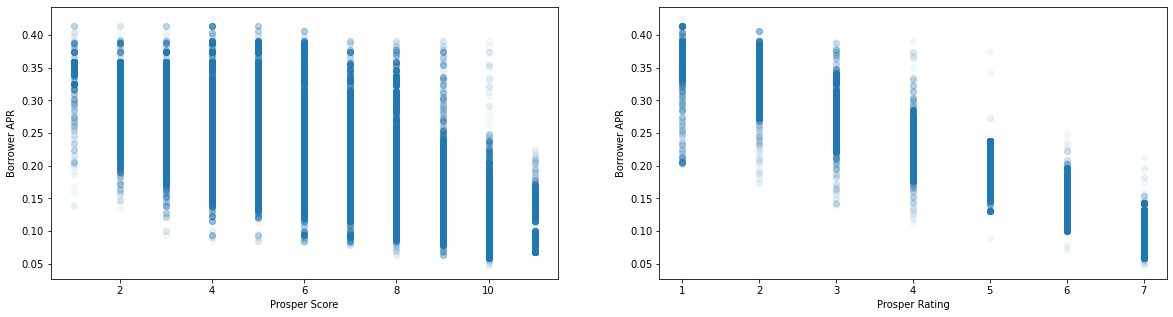

In [21]:
#create subplots with size adjustment, create scatterplots with transparency
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.scatter(data=loans, x = 'ProsperScore', y = 'BorrowerAPR', alpha = 1/20)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR')
plt.subplot(1,2,2)
plt.scatter(data=loans, x = 'ProsperRating (numeric)', y = 'BorrowerAPR', alpha = 1/20)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR');

In [22]:
loans['ProsperScore'].corr(loans['BorrowerAPR'])

-0.6682871968922671

In [23]:
loans['ProsperRating (numeric)'].corr(loans['BorrowerAPR'])

-0.9621512643207243

ProsperRating has a nearly perfect correlation to APR - it is clear that ProsperRating is far more determinitive than ProsperScore when it comes to borrower APR - Prosper seems to rely on ProsperRating in assessing borrower risk, much more so than ProsperScore.   

Next I'd like create boolean membership variables for chargeoff, default and deliquency loan statues, and observe their relationsip to credit factors that seemed to have little correlation to ProsperRating or ProsperScore - perhaps we can find credit features that deserve more weight in both ProsperRating and ProsperScore models.

## What relationship do lower weighted credit features have to chargeoff, default and delinquency?
To further my exploration of Prosper's approach to assessing borrower risk, I'd like to observe whether any lower weighted credit features have any relationship to instances of chargeoff, default or deliquency, especially those features that I expected to have strong correlation, like employment status duration and stated income.

In [24]:
#create list of all risk related loan statuses
cdd = ['Chargedoff','Defaulted','Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)']

In [25]:
#create list of loan statuses related to deliquency
delinquent = ['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)']
#create new column with boolean values using membership logic
loans['Delinquent'] = loans['LoanStatus'].isin(delinquent)

In [26]:
chargedoff = ['Chargedoff']
#create new column with boolean values using membership logic
loans['Chargedoff'] = loans['LoanStatus'].isin(chargedoff)

In [27]:
defaulted = ['Defaulted']
#create new column with boolean values using membership logic
loans['Defaulted'] = loans['LoanStatus'].isin(defaulted)

### Does a borrowers employment status duration have any impact on the likelyhood of chargeoff, default, or delinquency?

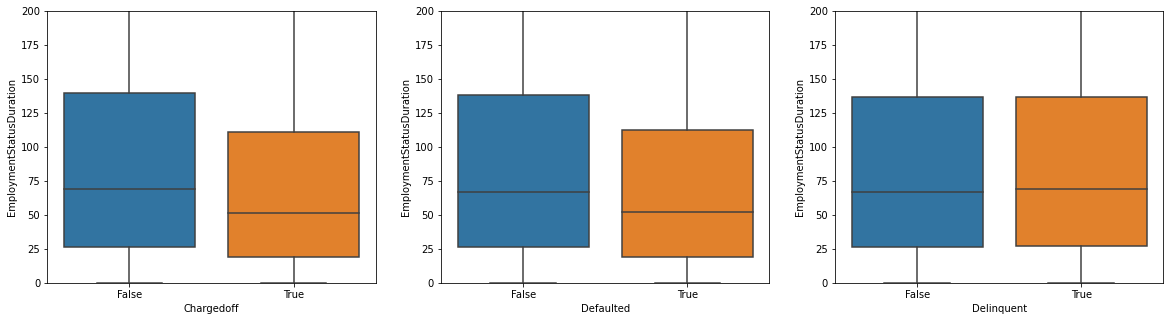

In [28]:
#plot distribution of each risk related loan status against ESD, limit y-axis
plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
sb.boxplot(data=loans, x = 'Chargedoff', y = 'EmploymentStatusDuration')
plt.ylim((0, 200))
plt.subplot(1,3,2)
sb.boxplot(data=loans, x = 'Defaulted', y = 'EmploymentStatusDuration')
plt.ylim((0, 200))
plt.subplot(1,3,3)
sb.boxplot(data=loans, x = 'Delinquent', y = 'EmploymentStatusDuration')
plt.ylim((0, 200));

These distributions look quite different, suggesting that employment status duration has some relationship to chargeoff, default and deliquency, which is somewhat surprising given that this feature seems to have so little correlation to Prosper's risk assessment. Let's look at average employment status duration for chargeoff and default.

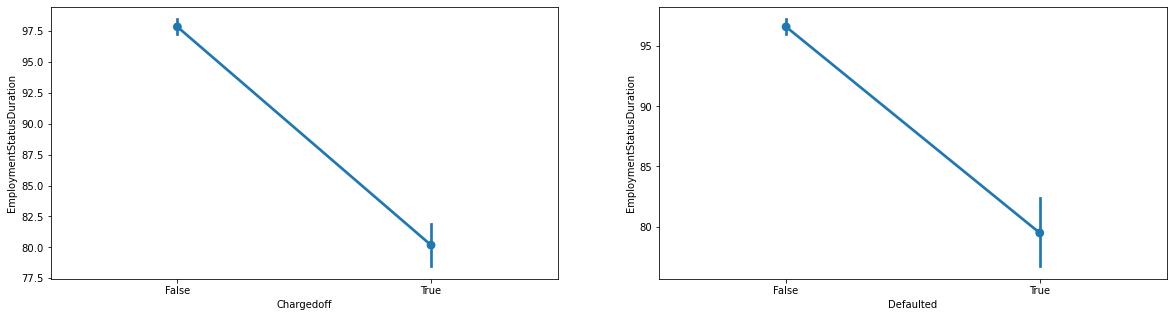

In [29]:
#plot averages with pointplots
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.pointplot(data=loans, x = 'Chargedoff', y = 'EmploymentStatusDuration')
plt.subplot(1,2,2)
sb.pointplot(data=loans, x = 'Defaulted', y = 'EmploymentStatusDuration');

More evidence that this feature has a relationship to the likelyhood of chargeoff and default. Let's see if employment status duration has any correlation to another lower weighted feature, stated monthly income.

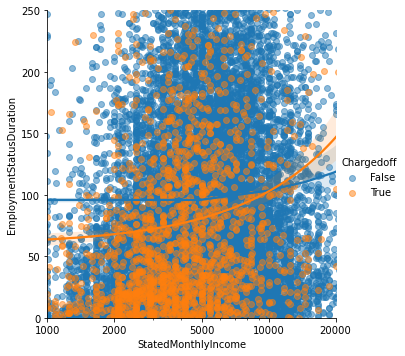

In [30]:
#sample loans df, create custom bins, ticks and labels for transformation of x-axis to log scale
#create facetgrid with hue variable and map to regplot with transparency
#transform to log scale
#limit y and x axes
#add legend
loans_sample = loans.sample(20000)
bins = 10 ** np.arange(0,6.24 + 0.1, 0.1)
ticks = [1000,2000,5000,10000,20000,50000,100000,200000]
labels = ['{}'.format(v) for v in ticks]
g = sb.FacetGrid(data=loans_sample, hue = 'Chargedoff', height = 5)
g.map(sb.regplot, 'StatedMonthlyIncome', 'EmploymentStatusDuration', scatter_kws = {'alpha': 1/2})
plt.xscale('log')
plt.xticks(ticks, labels)
plt.ylim((0,250))
plt.xlim((1000, 20000))
g.add_legend();

While employment status duration and stated monthly income do not have a strong correlation to one another, this plot is helpful as you can see a pattern in the occurences of chargeoff in relation to both features. Most chargeoffs are occurring on loans with employment status durations below 100, and with incomes below 7000. As this plot is somewhat overplotted, let's isolate chargeoffs, pull a smaller sample and run it again.

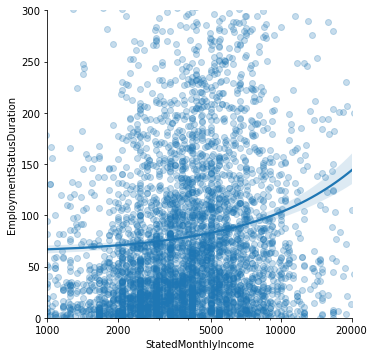

In [31]:
#repeat plot above using data that is queried to include chargeoffs only
loans_esd_sample = loans.query('Chargedoff == True').sample(5000)
bins = 10 ** np.arange(0,6.24 + 0.1, 0.1)
ticks = [1000,2000,5000,10000,20000,50000,100000,200000]
labels = ['{}'.format(v) for v in ticks]
g = sb.FacetGrid(data=loans_esd_sample, height = 5)
g.map(sb.regplot, 'StatedMonthlyIncome', 'EmploymentStatusDuration', scatter_kws = {'alpha': 1/4})
plt.xscale('log')
plt.xticks(ticks, labels)
plt.ylim((0,300))
plt.xlim((1000, 20000))
g.add_legend();

We see the same pattern: most chargeoffs are occurring on loans with lower employment durations and income below 7000.  

Now that its fairly clear that employment duration and income impact a borrower's likelyhood of chargeoff, let's see if employent duration has any impact on APR.

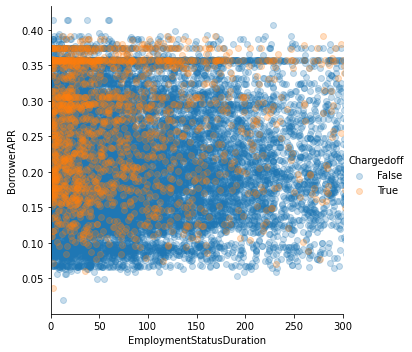

In [32]:
#plot ESD against APR on scatterplot with transparency and limited x-axis
g = sb.FacetGrid(data=loans_sample, hue = 'Chargedoff', height = 5)
g.map(plt.scatter, 'EmploymentStatusDuration', 'BorrowerAPR', alpha = 1/4)
plt.xlim((0,300))
g.add_legend();

In [33]:
loans['EmploymentStatusDuration'].corr(loans['BorrowerAPR'])

-0.008588600881412958

The few observations above reveal something surprising - APR, with a nearly perfect correlation to ProsperRating, has virtually zero correlation to employment status duration, a feature which exhibits fairly strong correlation to risk. I'll explore this further be creating segments of borrowers, segmented by rating, employment status duration and stated monthly income. I'll create them at more extreme ends of a rating, to see if vastly different chargeoff probabilities exist within the same rating.

### Do A rated borrowers with very different employment durations and incomes display a different chargeoff probability?
Let's look at A rated borrowers who's employment duration is above 200 and whos income is above 5000, and compare those borrowers to borrowers with employment duration less than 75 and income less than 5000. We'll observe differences in the rate of chargeoff and APR.

In [34]:
#rename ProsperRating variable for use in queries
loans.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating'}, inplace = True)

In [35]:
#create segmented series for use in pie plots
loans_a_200_5000 = loans.query('ProsperRating == "A" and EmploymentStatusDuration > 200 and StatedMonthlyIncome > 5000')
loans_a_75_5000 = loans.query('ProsperRating == "A" and EmploymentStatusDuration < 75 and StatedMonthlyIncome < 5000')
loans_a_200_5000_co = loans.query('ProsperRating == "A" and EmploymentStatusDuration >= 200 and StatedMonthlyIncome > 5000 and LoanStatus not in "cdd"')['Chargedoff'].value_counts(normalize=True)
loans_a_75_5000_co = loans.query('ProsperRating == "A" and EmploymentStatusDuration < 75 and StatedMonthlyIncome < 5000 and LoanStatus not in "cdd"')['Chargedoff'].value_counts(normalize=True)

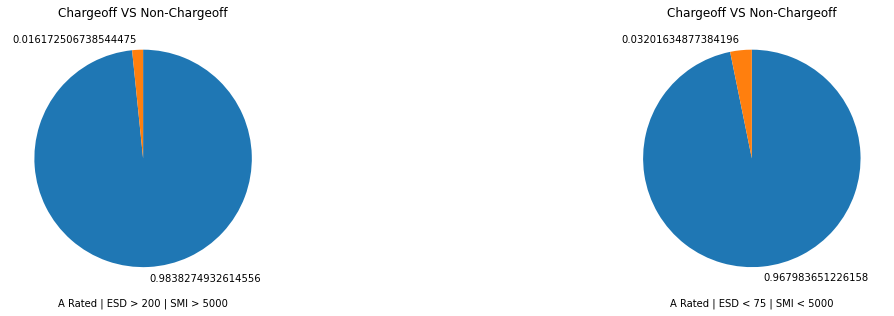

In [36]:
#create pieplots to display chargeoff rates for segments
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
plt.pie(loans_a_200_5000_co, labels = loans_a_200_5000_co.values, startangle = 90, counterclock = False)
plt.xlabel('A Rated | ESD > 200 | SMI > 5000')
plt.title('Chargeoff VS Non-Chargeoff')
plt.subplot(1,2,2)
plt.pie(loans_a_75_5000_co, labels = loans_a_75_5000_co.values, startangle = 90, counterclock = False)
plt.title('Chargeoff VS Non-Chargeoff')
plt.xlabel('A Rated | ESD < 75 | SMI < 5000');

In [37]:
#calculate mean APR for segment
loans_a_200_5000['BorrowerAPR'].mean()

0.1392977876106206

In [38]:
loans_a_75_5000['BorrowerAPR'].mean()

0.13837175408719324

We see that borrowers with ESD > 200 and SMI > 5000 have a chargeoff rate of 1.6%, while borrowers with ESD < 75 and SMI < 5000 have a chargeoff rate of 3.2%. In other words, a loan disbursed to a borrower at the lower extreme is twice as likely to be charged off. 

At the same time, very surprisingly, an A rated borrower with higher employment duration and higher income actually pays a slightly higher APR: 13.9% compared to 13.8%.

Let's see how the lower extreme at rating AA compares to the upper extreme at rating A.

### Can a less risky borrower pay a higher APR than a more risky customer?

In [39]:
#create segmented series for use in pieplot
loans_aa_75_5000_co = loans.query('ProsperRating == "AA" and EmploymentStatusDuration < 75 and StatedMonthlyIncome < 5000 and LoanStatus not in "cdd"')['Chargedoff'].value_counts(normalize = True)

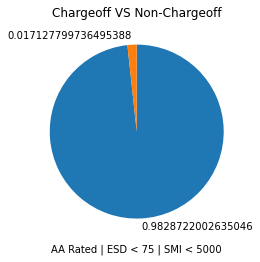

In [40]:
#create pieplot to display chargeoff rate for segment
plt.pie(loans_aa_75_5000_co , labels = loans_aa_75_5000_co .values, startangle = 90, counterclock = False)
plt.xlabel('AA Rated | ESD < 75 | SMI < 5000')
plt.title("Chargeoff VS Non-Chargeoff");

In [41]:
loans_aa_75_5000 = loans.query('ProsperRating == "AA" and EmploymentStatusDuration < 75 and StatedMonthlyIncome < 5000')

In [42]:
loans_aa_75_5000['BorrowerAPR'].mean()

0.0903823847167326

Here we find a result that contradicts with the overall rating model:

Rating AA, ESD < 75, SMI < 5000, chargeoff rate: 1.7%, mean APR: 9%  
Rating A, ESD > 200, SMI > 5000, chargeoff rate: 1.6%, mean APR: 13.9%  

The borrowers in the lower segment are 6% less likely to have their loans charged off, yet they are rated lower and therefore pay a higher rate. In this instance, **a borrower with 6% less risk is paying an APR 54% higher**.

Let's see what we find when we go down to rating E.

### Do E rated borrowers with very different employment durations and incomes display a different chargeoff probability?

In [43]:
loans_e_200_5000 = loans.query('ProsperRating == "E" and EmploymentStatusDuration >= 200 and StatedMonthlyIncome > 5000')
loans_e_75_5000 = loans.query('ProsperRating == "E" and EmploymentStatusDuration < 75 and StatedMonthlyIncome < 5000')
loans_e_200_5000_co = loans.query('ProsperRating == "E" and EmploymentStatusDuration >= 200 and StatedMonthlyIncome > 5000 and LoanStatus not in "cdd"')['Chargedoff'].value_counts(normalize=True)
loans_e_75_5000_co = loans.query('ProsperRating == "E" and EmploymentStatusDuration < 75 and StatedMonthlyIncome < 5000 and LoanStatus not in "cdd"')['Chargedoff'].value_counts(normalize=True)

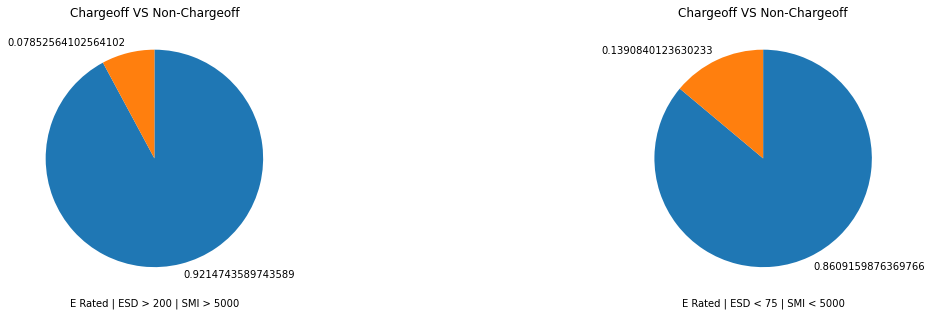

In [44]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
plt.pie(loans_e_200_5000_co, labels = loans_e_200_5000_co.values, startangle = 90, counterclock = False)
plt.xlabel('E Rated | ESD > 200 | SMI > 5000')
plt.title('Chargeoff VS Non-Chargeoff')
plt.subplot(1,2,2)
plt.pie(loans_e_75_5000_co, labels = loans_e_75_5000_co.values, startangle = 90, counterclock = False)
plt.xlabel('E Rated | ESD < 75 | SMI < 5000')
plt.title('Chargeoff VS Non-Chargeoff');

In [45]:
loans_e_200_5000['BorrowerAPR'].mean()

0.3296990544871794

In [46]:
loans_e_75_5000['BorrowerAPR'].mean()

0.331812601854457

Again we see that borrowers with lower employment duration and income are roughly twice as likely to chargeoff than those with higher employment duration and income, within the same ProsperRating, and APRs are virtually identical.  

Let's now determine wether or not a borrower with higher employment duration and income might actually belong in the next rating up, based on rate of chargeoff.

In [47]:
loans_d = loans.query('ProsperRating == "D"')['Chargedoff'].value_counts(normalize = True)

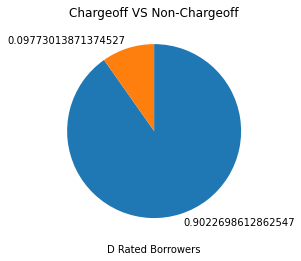

In [48]:
plt.pie(loans_d, labels = loans_d.values, startangle = 90, counterclock = False)
plt.xlabel('D Rated Borrowers')
plt.title('Chargeoff VS Non-Chargeoff');

We see that the overall chargeoff rate for rating D is 9.7%, while the ESD > 200 SMI > 5000 segment from rating E is 7.8%.  

Next let's compare the lower extreme at rating D compared to the upper extreme of rating E.

In [49]:
loans_d_75_5000_co = loans.query('ProsperRating == "D" and EmploymentStatusDuration < 75 and StatedMonthlyIncome < 5000 and LoanStatus not in "cdd"')['Chargedoff'].value_counts(normalize=True)

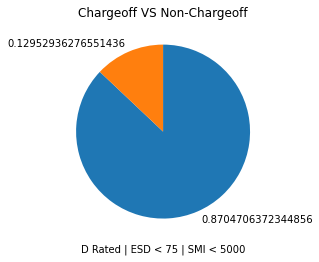

In [50]:
plt.pie(loans_d_75_5000_co, labels = loans_d_75_5000_co.values, startangle = 90, counterclock = False)
plt.xlabel('D Rated | ESD < 75 | SMI < 5000')
plt.title('Chargeoff VS Non-Chargeoff');

In [51]:
loans_d_75_5000 = loans.query('ProsperRating == "D" and EmploymentStatusDuration < 75 and StatedMonthlyIncome < 5000')

In [52]:
loans_d_75_5000['BorrowerAPR'].mean()

0.282137894627241

Here is what we find:

Rating D, ESD < 75, SMI < 5000, chargeoff rate: 12.9%, mean APR: 28.2%  
Rating E, ESD > 200, SMI > 5000, chargeoff rate: 7.8%, mean APR: 32.9%  

The borrowers in the lower segment are 38% less likely to have their loans charged off, yet they are rated lower and therefore pay a higher rate. In this instance, **a borrower with 38% less risk is paying an APR 17% higher.**

In [53]:
loans.shape

(113937, 84)

In [54]:
loans.query('EmploymentStatusDuration >= 200 and StatedMonthlyIncome > 5000').shape

(8204, 84)

In [55]:
#calculating population proportion of segment
segment_percent = 8204 / 113937

In [56]:
segment_percent

0.07200470435416063

Approximately 7% of borrowers are being mis-classed? Is is important to offer competitive rates to qualified borrowers? 

In [59]:
df_e_vs_d = pd.DataFrame({'segment': ['D Rated | ESD < 75 | SMI < 5000','E Rated | ESD > 200 | SMI > 5000'], 'chargeoff_rate': [12.9, 7.8], 'APR': [28.2, 32.9]})

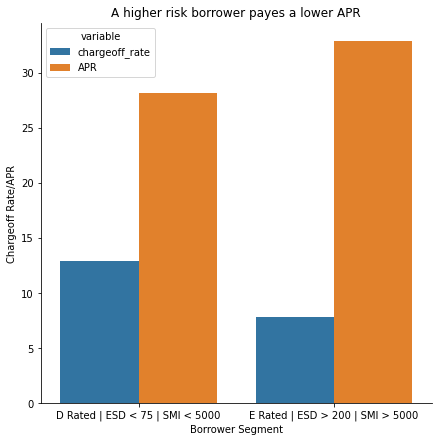

In [60]:
fig, ax1 = plt.subplots(figsize=(7,7))
tidy = df_e_vs_d.melt(id_vars='segment')
sb.barplot(x ='segment', y='value', hue='variable', data=tidy, ax=ax1)
sb.despine(fig)
plt.xlabel('Borrower Segment')
plt.ylabel('Chargeoff Rate/APR')
plt.title('A higher risk borrower payes a lower APR');

In [57]:
#creating custom dataframe for use in barplot
df_aa_vs_a = pd.DataFrame({'segment': ['AA Rated | ESD < 75 | SMI < 5000','A Rated | ESD > 200 | SMI > 5000'], 'chargeoff_rate': [1.7, 1.6], 'APR': [9.0, 13.9]})

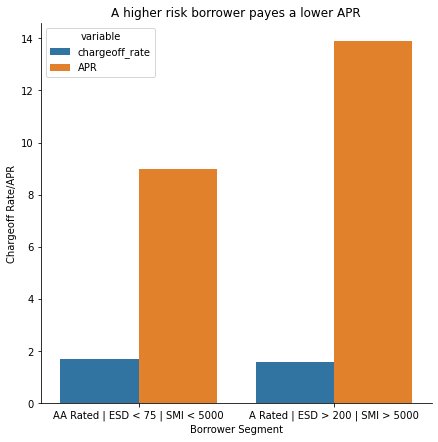

In [58]:
#create subplots, melt dataframe, create clustered barplot
fig, ax1 = plt.subplots(figsize=(7,7))
tidy = df_aa_vs_a.melt(id_vars='segment')
sb.barplot(x ='segment', y='value', hue='variable', data=tidy, ax=ax1)
sb.despine(fig)
plt.xlabel('Borrower Segment')
plt.ylabel('Chargeoff Rate/APR')
plt.title('A higher risk borrower payes a lower APR');

## Segmentation Findings

One of our segmentations compares D rated borrowers to E rated borrowers. Here is what we see:

Rating D, ESD < 75, SMI < 5000, chargeoff rate: 12.9%, mean APR: 28.2%  
Rating E, ESD > 200, SMI > 5000, chargeoff rate: 7.8%, mean APR: 32.9%

The borrowers in the lower segment are 38% less likely to have their loans charged off, yet they are rated lower and therefore pay a higher rate. In this instance, **a borrower with 40% less risk is paying an APR 17% higher.**

We also compare AA rated borrowers with A rated borrowers:

Rating AA, ESD < 75, SMI < 5000, chargeoff rate: 1.7%, mean APR: 9%  
Rating A, ESD > 200, SMI > 5000, chargeoff rate: 1.6%, mean APR: 13.9%

The borrowers in the lower segment are 6% less likely to have their loans charged off, yet they are rated lower and therefore pay a higher rate. In this instance, **a borrower with 6% less risk is paying an APR 54% higher**

## The ESD > 200 SMI > 5000 segmentation is not a trivial population
This segment of borrowers represents 7.2% of the overall borrower population

## Conclusion
It seems that employment status duration and stated monthly income are features that should be more heavily weighted in Prosper's rating models. As the segmentation explored earlier represents a non-trivial portion of the overall borrower population, adjusting for ESD and SMI might allow for more competitive rate offers for qualified borrowers and a more accurate rating system overall. Additional credit features should also be investigated for correlation to Prosper Rating and relationship to borrower risk.